In [26]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [27]:
data = pd.read_csv('train.csv')

In [28]:
data = np.array(data)
m, n = data.shape
np.random.shuffle(data)

data_dev = data[0:1000].T
Y_dev = data_dev[0]
X_dev = data_dev[1:n]
X_dev = X_dev / 255.

data_train = data[1000:m].T
Y_train = data_train[0]
X_train = data_train[1:n]
X_train = X_train / 255.
_,m_train = X_train.shape

In [29]:
Y_train

array([0, 2, 2, ..., 1, 6, 3], dtype=int64)

In [30]:
def init_param():
    W1 = np.random.rand(10, 784) - 0.5
    b1 = np.random.rand(10, 1) - 0.5
    W2 = np.random.rand(10, 10) - 0.5
    b2 = np.random.rand(10, 1) - 0.5
    return W1, b1, W2, b2

In [31]:
def relu(Z):
    return np.maximum(Z, 0)

In [32]:
def softmax(Z):
    A = np.exp(Z) / sum(np.exp(Z))
    return A

In [33]:
def forward_prop(W1, b1, W2, b2, X):
    Z1 = W1.dot(X) + b1
    A1 = relu(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = softmax(Z2)
    return Z1, A1, Z2, A2

In [34]:
def activasi_relu(Z):
    return Z > 0

In [35]:
def one_hot(Y):
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    one_hot_Y = one_hot_Y.T
    return one_hot_Y

In [36]:
def backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y):
    one_hot_Y = one_hot(Y)
    dZ2 = A2 - one_hot_Y
    dW2 = 1 / m * dZ2.dot(A1.T)
    db2 = 1 / m * np.sum(dZ2)
    dZ1 = W2.T.dot(dZ2) * activasi_relu(Z1)
    dW1 = 1 / m * dZ1.dot(X.T)
    db1 = 1 / m * np.sum(dZ1)
    return dW1, db1, dW2, db2

In [37]:
def update_param(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1    
    W2 = W2 - alpha * dW2  
    b2 = b2 - alpha * db2    
    return W1, b1, W2, b2

In [38]:
def predik(A2):
    return np.argmax(A2, 0)

In [39]:
def akurasi(prediksi, Y):
    print(prediksi, Y)
    return np.sum(prediksi == Y) / Y.size

In [40]:
def gradient_descent(X, Y, alpha, iterasi):
    W1, b1, W2, b2 = init_param()
    for i in range(iterasi):
        Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 = backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y)
        W1, b1, W2, b2 = update_param(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
        if i % 10 == 0:
            print("Iteration: ", i)
            prediksi = predik(A2)
            print(akurasi(prediksi, Y))
    return W1, b1, W2, b2

In [41]:
W1, b1, W2, b2 = gradient_descent(X_train, Y_train, 0.10, 500)

Iteration:  0
[8 8 0 ... 7 6 6] [0 2 2 ... 1 6 3]
0.06348780487804878
Iteration:  10
[5 0 1 ... 1 6 6] [0 2 2 ... 1 6 3]
0.1649268292682927
Iteration:  20
[5 1 1 ... 1 6 6] [0 2 2 ... 1 6 3]
0.21714634146341463
Iteration:  30
[5 0 1 ... 1 5 6] [0 2 2 ... 1 6 3]
0.25734146341463415
Iteration:  40
[2 0 1 ... 1 5 6] [0 2 2 ... 1 6 3]
0.29165853658536584
Iteration:  50
[2 0 1 ... 1 9 6] [0 2 2 ... 1 6 3]
0.34139024390243905
Iteration:  60
[2 3 1 ... 1 9 6] [0 2 2 ... 1 6 3]
0.3853658536585366
Iteration:  70
[2 3 1 ... 1 9 6] [0 2 2 ... 1 6 3]
0.4271463414634146
Iteration:  80
[2 2 1 ... 1 4 6] [0 2 2 ... 1 6 3]
0.46239024390243905
Iteration:  90
[2 2 1 ... 1 4 6] [0 2 2 ... 1 6 3]
0.4965121951219512
Iteration:  100
[2 2 1 ... 1 4 6] [0 2 2 ... 1 6 3]
0.5264878048780488
Iteration:  110
[2 2 1 ... 1 4 6] [0 2 2 ... 1 6 3]
0.5559024390243903
Iteration:  120
[2 2 1 ... 1 4 6] [0 2 2 ... 1 6 3]
0.5836097560975609
Iteration:  130
[2 2 1 ... 1 4 6] [0 2 2 ... 1 6 3]
0.6101219512195122
Iteration: 

In [42]:
def make_prediksi(X, W1, b1, W2, b2):
    _, _, _, A2 = forward_prop(W1, b1, W2, b2, X)
    prediksi = predik(A2)
    return prediksi

In [45]:
def test_prediksi(index, W1, b1, W2, b2):
    current_image = X_train[:, index, None]
    prediksi = make_prediksi(X_train[:, index, None], W1, b1, W2, b2)
    label = Y_train[index]
    print("Prediction: ", prediksi)
    print("Label: ", label)
    
    
    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

Prediction:  [5]
Label:  5


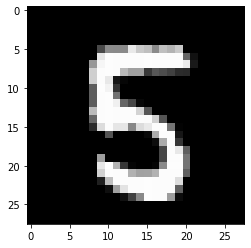

In [46]:
test_prediksi(7, W1, b1, W2, b2)

In [47]:
dev_predik = make_prediksi(X_dev, W1, b1, W2, b2)
akurasi(dev_predik, Y_dev)

[3 8 8 4 2 7 2 4 4 8 8 1 6 9 9 8 2 7 7 3 1 8 4 8 3 0 6 3 7 3 8 9 1 9 6 4 1
 5 1 3 9 0 7 0 3 0 1 3 1 5 3 7 9 9 2 7 1 9 1 7 1 7 1 7 3 0 7 3 1 9 6 6 9 9
 2 0 9 5 3 5 6 0 7 8 5 2 3 1 0 8 9 7 6 3 9 9 6 3 1 0 3 1 0 9 6 1 7 8 0 2 5
 8 1 7 0 0 7 7 9 3 3 6 6 7 9 6 0 6 1 7 5 9 0 9 4 0 5 9 4 4 6 9 0 5 3 1 2 9
 3 3 3 6 4 4 3 7 8 1 3 9 9 0 4 8 3 7 4 7 3 7 5 2 1 4 9 6 5 3 2 4 8 2 7 0 2
 1 3 4 9 1 0 6 9 7 5 1 1 9 1 6 6 9 3 1 2 5 1 9 3 2 0 7 7 2 1 2 4 1 8 9 1 0
 2 1 5 0 8 3 6 6 0 5 8 3 6 7 1 7 3 3 3 6 4 4 6 3 9 9 4 8 7 2 2 6 3 1 0 3 2
 0 1 9 1 9 0 1 7 0 7 0 4 2 8 3 7 5 6 9 3 5 6 0 6 3 4 2 1 8 1 7 3 5 3 4 7 5
 6 1 7 3 7 9 7 2 2 2 2 0 6 3 1 2 4 7 9 7 0 8 1 1 3 4 2 4 4 0 3 7 3 6 8 5 3
 7 0 0 8 5 2 6 5 7 3 0 3 6 5 7 3 4 3 6 4 3 3 7 9 5 8 1 4 4 3 7 6 9 7 5 2 4
 0 0 1 7 3 8 8 2 9 1 9 1 2 5 5 2 6 5 0 0 1 0 1 1 6 1 6 1 1 7 6 6 0 7 4 1 1
 6 0 1 4 1 6 2 3 0 2 3 8 3 5 6 6 6 1 8 2 9 2 9 5 7 9 1 6 6 9 8 0 9 8 0 3 9
 6 8 0 2 8 3 7 1 4 6 5 9 4 9 3 2 9 1 4 4 4 3 4 3 6 4 3 8 5 2 9 0 1 0 4 8 3
 8 4 9 6 2 3 3 5 1 4 5 2 

0.841